# visualize the t-test results on fitted coefficients

In [1]:
import pickle
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from param import *

output_dir = ParamDir().OUTPUT_DIR
datalist = ParamDir().data_path_list


## Representatives

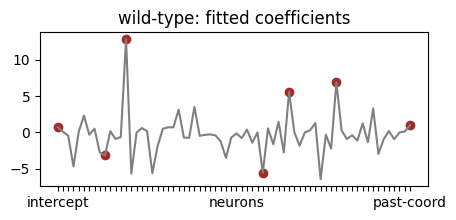

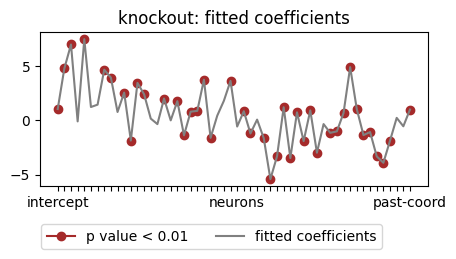

In [6]:
for data_dir in datalist[[2,0]]:
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
        eval_results_all = pickle.load(f)


    conf_level = .01
    coord_axis, nthist= "x-axis", 1
    result = [result for result in eval_results_all if (result["coord_axis"] == coord_axis) and (result["nthist"]==nthist)][0]

    fig, ax = plt.subplots(figsize=(5,2))
    ax.plot(result["estimator"].fitted_param, label = f"nthist:", c="gray")

    labels = ax.get_xticks().tolist()
    xx = np.arange(len(result["estimator"].fitted_param))
    for ii, p_value in enumerate(result['sig_tests'].t_p_value_list):
        if (p_value < conf_level) or (p_value > 1 - conf_level):
            ax.scatter(xx[ii], result["estimator"].fitted_param[ii], c="brown")
    labels = [''] * len(result["estimator"].fitted_param)
    labels[0],labels[int(len(labels)/2)] ,labels[-1] = "intercept", "neurons", "past-coord"
    ax.set_xticks(xx, labels)
    ax.set_title(f"{mouse_type}: fitted coefficients")

legend_elements = [
                Line2D([0], [0], marker='o', c="brown", label=f"p value < {conf_level}"),
                Line2D([0], [0], c="gray", label=f"fitted coefficients")
                ]
ax.legend(handles=legend_elements, ncol=2, bbox_to_anchor=(.9, -.2))


## All mice

Text(0.5, 0.98, 'confidence level:0.01')

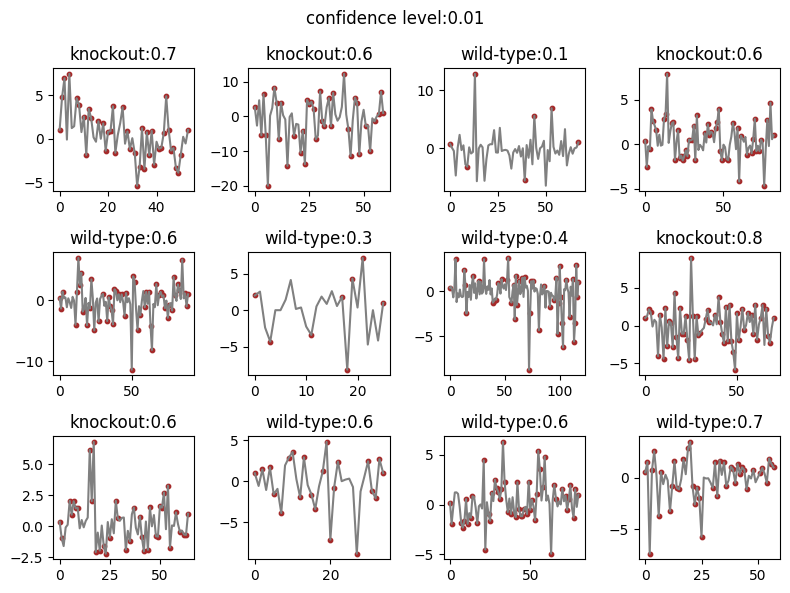

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(8,6), tight_layout = True)
conf_level = .01
axes = axes.ravel()
for mouse_id, data_dir in enumerate(datalist):
    ax = axes[mouse_id]
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
        eval_results_all = pickle.load(f)

    coord_axis, nthist= "x-axis", 1
    result = [result for result in eval_results_all if (result["coord_axis"] == coord_axis) and (result["nthist"]==nthist)][0]

    ax.plot(result["estimator"].fitted_param, label = f"nthist:", c="gray")

    labels = ax.get_xticks().tolist()
    xx = np.arange(len(result["estimator"].fitted_param))
    pass_p = 0
    for ii, p_value in enumerate(result['sig_tests'].t_p_value_list):
        if (p_value < conf_level) or (p_value > 1 - conf_level):
            pass_p += 1
            ax.scatter(xx[ii], result["estimator"].fitted_param[ii], c="brown", s=10)
    # labels = [''] * len(result["estimator"].fitted_param)
    # labels[0],labels[int(len(labels)/2)] ,labels[-1] = "intercept", "neurons", "past-coord"
    # ax.set_xticks(xx, labels)
    ax.set_title(f"{mouse_type}:{pass_p/len(xx):.1f}")

plt.suptitle(f"confidence level:{conf_level}")